# **importing the required libraries**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from numpy import int64
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# loading the dataset

In [ ]:
df = pd.read_csv("/content/diabetes.csv",encoding='latin1')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


# **Data Cleaning**

Missing data can either be filled with the means of the features or maybe 0 to ignore them or even other data imputation techniques to predict the missing values
In this case the mean of the features is taken for the missing values.

In [ ]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [ ]:
#applying label encodings
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
df['Diabetes'] = ohe.fit_transform(df['Diabetes'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


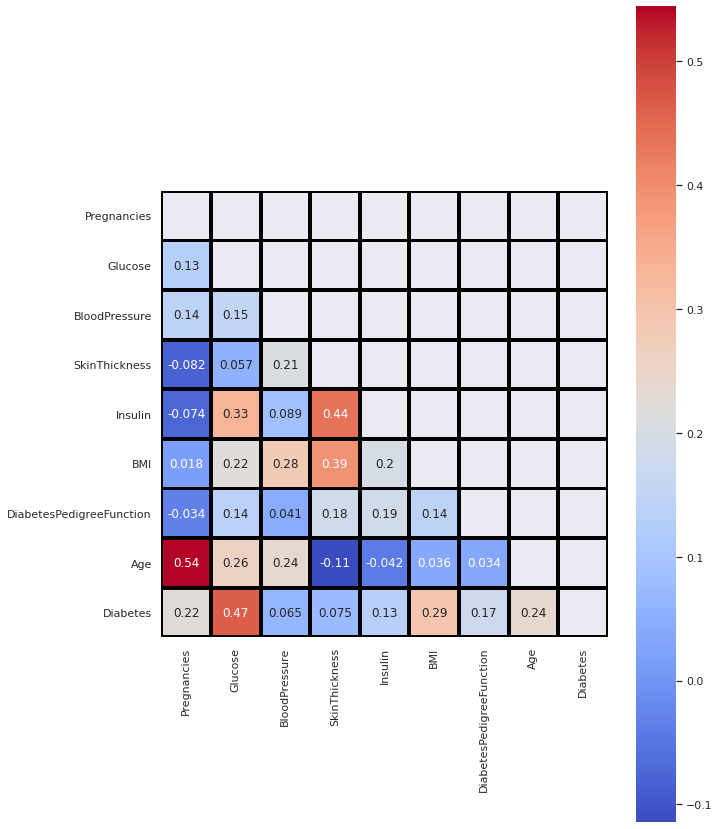

In [ ]:
#plotting correlation values
matrix = np.triu(df.corr())
sns.set(rc={'figure.figsize':(10,15)})
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True , mask=matrix)

# Logistic Regression



In [ ]:
# Selecting the DEPENDENT and INDEPENDENT  varables.
y = df['Diabetes']
x = df[['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]

In [ ]:
# Splitting the dataset into TRAIN and TEST data. 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
#x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from math import *
# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_pred= model.predict(x_test) # 0:Overcast, 2:Mild
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy % :",ceil(metrics.accuracy_score(y_test, y_pred)*100))
p = pd.DataFrame(list(zip(x_test,y_test,y_pred)),columns=['x','target_y','predicted_y'])
p.head()

Accuracy: 0.8181818181818182
Accuracy % : 82


,x,target_y,predicted_y
0,Pregnancies,1,1
1,Insulin,0,0
2,BMI,0,0
3,Age,1,1
4,Glucose,0,0


# **outlier detection**


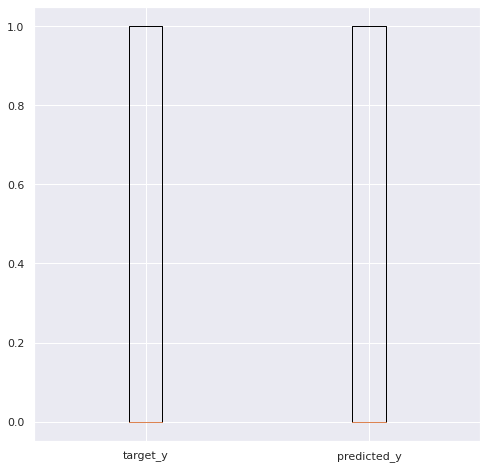

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([p['target_y'],p['predicted_y']], labels=['target_y', 'predicted_y'])
plt.show()

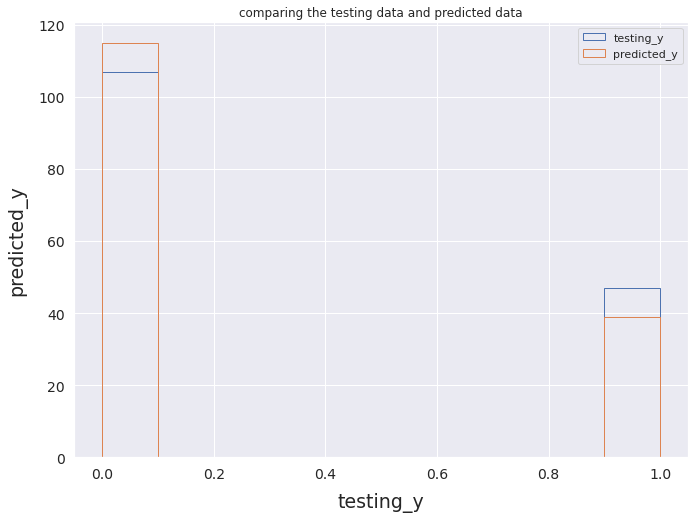

In [ ]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(y_test,label='testing_y',histtype='step')
ax.hist(y_pred,label='predicted_y',histtype='step')
plt.title('comparing the testing data and predicted data')
plt.xlabel('testing_y', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('predicted_y', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');


#plt.savefig("y_vs_yhat.png");

#looking at the distribution of my target variable versus my predictions

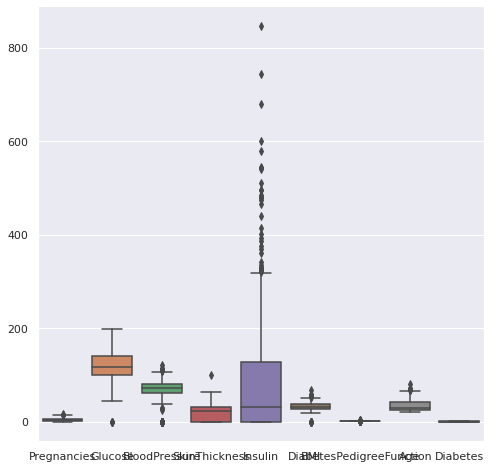

In [ ]:
#EDA
sns.boxplot(data=df)
plt.show()